Add your import statements and the database connection statements in the below code block

In [2]:
#your code here
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import libpysal as ps
import numpy as np
import esda
%matplotlib inline

### **Question 1**:  
Using the Libpysal Data, create a choropleth path of the United States that depicts the per capita income of each US state in 2009.

**Note:** 
* The Libpysal and GeoPandas libraries both contain utility functions that may make this task easier.
* The choropleth map should have the following parameters:
    - legend
    - Title should be '**Per Capita Income of US States on Choropleth Map**'
    - xlabel should be '**US Income**'
* Do not set font size or font-weight for titles and labels and figure size for the plot.

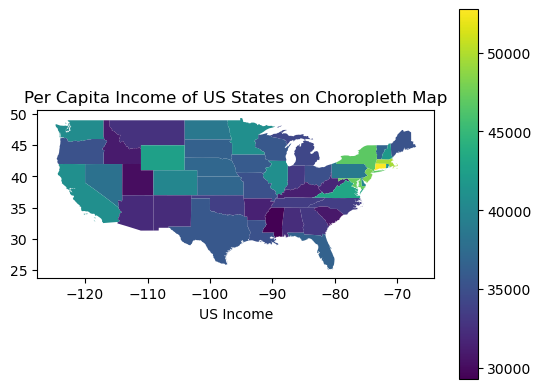

In [3]:
### TEST FUNCTION: test_question1
# DO NOT MODIFY OR REMOVE THE ABOVE LINE
# your code here
# Merge the dataframes on the state name column

income = pd.read_csv(ps.examples.get_path('usjoin.csv'))
shape = gpd.read_file(ps.examples.get_path('us48.shp'))
# print(income.head())
# print("=================")
# print(shape.head())
mergedIncome = shape.merge(income, left_on='STATE_NAME', right_on='Name')
mergedIncome.plot(column='2009', legend=True)
plt.xlabel('US Income')
plt.title('Per Capita Income of US States on Choropleth Map')
plt.show()
#print(mergedIncome.columns)
#print(mergedIncome.head())

### **Question 2**:
Again using the Libpysal Data, create a proportional symbol map showing a dot at the centroid of each state that is scaled to the per capita income of each US state in 2009.

**Note:** 
* The demonstration notebook for this unit contains code that performs a similar task and may be a useful reference for your assignment.
* The proportional symbol map should have the following parameters:
    * Title should be '**Proportional Symbol Map**'
    * xlabel should be '**US Income**'
* Do not set font size or font-weight for titles and labels and figure size for the plot.

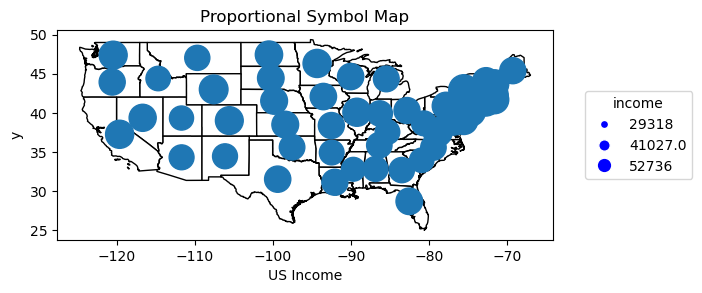

In [4]:
### TEST FUNCTION: test_question2
# DO NOT MODIFY OR REMOVE THE ABOVE 
# your code here

mergedIncome['centroid'] = mergedIncome.geometry.centroid
centroids = list(mergedIncome['centroid'])


df = pd.DataFrame({'y':[centroids[i].y for i in range(len(centroids))],
                   'x':[centroids[i].x for i in range(len(centroids))],
                   'data':list(mergedIncome['2009'])})
#print(mergedIncome)
base = mergedIncome.plot(color='white', edgecolor='black')
df.plot(kind='scatter', x='x', y ='y', s=df['data']/100, ax=base)
min_income = mergedIncome['2009'].min()
max_income = mergedIncome['2009'].max()

#draw legend
handles = []
sizes = [min_income, ((min_income + max_income) / 2), max_income]
for size in sizes:
    handles.append(mlines.Line2D([], [], marker='o', color='w', markerfacecolor='blue', markersize=size/5000, 
                                linestyle='None', label=f'{size}'))
plt.legend(handles=handles, loc='center left', bbox_to_anchor=(1.05, 0.5), title='income')
#print(mergedIncome.head())
#print(centroids)
plt.xlabel('US Income')
plt.title('Proportional Symbol Map')
plt.show()

### **Question 3**:
Using the same data, compute the value of Moran's I for the per capita income of each US state in 2009 using Rook Continuity. Report the value of I rounded to 4 decimal places (i.e. x.XXXX)

**Note:** 
* You need to merge the two datasets and then apply
Rook Continuity
* Use the `esda` library to calculate the Moran's value.
* To calculate Moran’s I, you need two things: the value of interest (y) and a weight matrix (w).
* Print only the calculated Moran's value rounded to 4 in the code cell below.
* There should only be one print statement in the below cell.

In [18]:
### TEST FUNCTION: test_question3
# DO NOT MODIFY OR REMOVE THE ABOVE 
# your code here

w = ps.weights.Rook.from_dataframe(mergedIncome, use_index=True)
y = np.array(mergedIncome['2009'])
mi = esda.Moran(y, w, two_tailed=False)
moranValue = mi.I
print(f"{moranValue:.4f}")

0.4256
